In [1]:
import pandas as pd
import numpy as np
import datetime
data = pd.read_csv("2019_X5_STORES.csv")
le_masque = data['position_name'] == 'Продавец-кассир'
le_masque &= data['is_active_action'] == True
df = data[le_masque]
df_new = df.copy()
df_new

D:\misis\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id_applicant,id_partner,id_log,department_id,action_date,stage_name,activity_name,result_name,position_name,is_active_action,is_open_action
0,3571030,3169360,-1,9690,2019-03-25 11:19:30.22263+00,Создание кандидата,NaN,NaN,Продавец-кассир,True,False
1,3557079,3156593,-1,9690,2019-03-20 14:15:12.627618+00,Создание кандидата,NaN,NaN,Продавец-кассир,True,False
2,3533154,3148604,-1,9690,2019-03-13 14:05:24.154745+00,Создание кандидата,NaN,NaN,Продавец-кассир,True,False
3,3506567,2267753,-1,9690,2019-03-04 16:10:11.28085+00,Создание кандидата,NaN,NaN,Продавец-кассир,True,False
4,3481025,3076621,-1,9690,2019-02-23 17:38:34.772531+00,Создание кандидата,NaN,NaN,Продавец-кассир,True,False
...,...,...,...,...,...,...,...,...,...,...,...
6370927,3479558,3108474,-1,5903,2020-04-23 15:38:59.865221+00,Интервью с руководителем,Узнать результаты интервью с руководителем,NaN,Продавец-кассир,True,True
6370928,3447754,3091458,-1,5903,2020-04-23 15:38:59.865221+00,Ожидание,Вернуть в воронку,NaN,Продавец-кассир,True,True
6370929,3442892,3076687,-1,5903,2020-04-23 15:38:59.865221+00,Интервью с руководителем,Узнать результаты интервью с руководителем,NaN,Продавец-кассир,True,True
6370930,3406359,3076584,-1,5903,2020-04-23 15:38:59.865221+00,Интервью с руководителем,Узнать результаты интервью с руководителем,NaN,Продавец-кассир,True,True


In [2]:
def convert(val):
    if val.find(".") == -1:
        if val.find("+") == -1:
            date_time_obj = "Null"
        else:
            val = val[:val.find("+")]
            date_time_obj = datetime.datetime.strptime(val, '%Y-%m-%d %H:%M:%S')
    else:
        val = val[:val.find(".")]
        date_time_obj = datetime.datetime.strptime(val, '%Y-%m-%d %H:%M:%S')
    return date_time_obj

In [3]:
df_new['action_date'] = df_new['action_date'].apply(convert)
df_new = df_new.sort_values(by = ['id_applicant', 'action_date'])
df_new

,id_applicant,id_partner,id_log,department_id,action_date,stage_name,activity_name,result_name,position_name,is_active_action,is_open_action
112200,3330764,1945965,-1,43730,2019-01-03 09:08:42,Создание кандидата,NaN,NaN,Продавец-кассир,True,False
945704,3330764,1945965,17153661,43730,2019-01-03 09:09:01,Обработка,Провести первичную обработку,Подходит,Продавец-кассир,True,False
945705,3330764,1945965,17153662,43730,2019-01-03 09:09:02,Обработка,Проверка формы обращения,Не резерв,Продавец-кассир,True,False
945703,3330764,1945965,17153663,43730,2019-01-03 09:09:27,Интервью с руководителем,Назначить интервью с руководителем,Встреча назначена,Продавец-кассир,True,False
945700,3330764,1945965,17184864,43730,2019-01-09 16:44:58,Интервью с руководителем,Узнать результаты интервью с руководителем,Нет обратной связи,Продавец-кассир,True,False
...,...,...,...,...,...,...,...,...,...,...,...
859590,4461737,3666179,-1,9329,2019-12-31 15:59:37,Создание кандидата,NaN,NaN,Продавец-кассир,True,False
696938,4461738,3666180,-1,47357,2019-12-31 15:59:39,Создание кандидата,NaN,NaN,Продавец-кассир,True,False
1234625,4461738,3666180,26761529,47357,2020-03-31 12:22:56,Не прошел СБ,Вывести из черного списка,В белый список,Продавец-кассир,True,False
818703,4461742,3194598,-1,36270,2019-12-31 16:33:01,Создание кандидата,NaN,NaN,Продавец-кассир,True,False


In [9]:
parthner_array1 = df_new[((df_new['result_name'] == 'Принят') & (df_new['stage_name'] == 'Оформление'))]['id_applicant'].unique() 
parthner_array2 = df_new[(df_new['stage_name'] == 'Выход на работу') & (df_new['result_name'] == 'Принят')]['id_applicant'].unique()
parthner_array=np.concatenate((parthner_array1, parthner_array2), axis=None)
# время найма по заявкам
tth = pd.DataFrame(columns=('Обработка', 'Интервью с руководителем', 'СБ', 'Оформление'))
doubleT = []
for i in parthner_array:
    parthner = df_new[df_new['id_applicant'] == i]
    
    if len(parthner[parthner['stage_name'] == 'Обработка']['action_date'])!=0:
        if  (max(parthner[parthner['stage_name'] == 'Обработка']['action_date']) >  min(parthner[(parthner['stage_name'] == 'Оформление')]['action_date'])):
            doubleT.append(i)
        else:
            if len(parthner[parthner['stage_name'] == 'Обработка']['action_date'])!=0:
                if len(parthner[parthner['stage_name'] == 'Создание кандидата']['action_date'])!=0:
                    treatment = max(parthner[parthner['stage_name'] == 'Обработка']['action_date']) - min(parthner[parthner['stage_name'] == 'Создание кандидата']['action_date'])
                else:
                    treatment = max(parthner[parthner['stage_name'] == 'Обработка']['action_date']) - min(parthner[parthner['stage_name'] == 'Обработка']['action_date'])   
            else:
                treatment = None

            if len(parthner[parthner['stage_name'] == 'Интервью с руководителем']['action_date'])!=0:
                interview = max(parthner[parthner['stage_name'] == 'Интервью с руководителем']['action_date'])- min(parthner[parthner['stage_name'] == 'Интервью с руководителем']['action_date'])
            else:
                interview = None

            if len(parthner[parthner['stage_name'] == 'СБ']['action_date'])!=0:
                secServ = max(parthner[parthner['stage_name'] == 'СБ']['action_date'])- min(parthner[parthner['stage_name'] == 'СБ']['action_date'])
            else:
                secServ = None

            if (len(parthner[parthner['stage_name'] == 'Оформление']['action_date'])!=0) or len(parthner[(parthner['stage_name'] == 'Выход на работу')]['action_date'])!=0:
                if len(parthner[(parthner['stage_name'] == 'Выход на работу') & (parthner['result_name'] == 'Принят')]['action_date'])!=0:
                    registration = max(parthner[(parthner['stage_name'] == 'Выход на работу') & (parthner['result_name'] == 'Принят')]['action_date'])- min(parthner[parthner['stage_name'] == 'Оформление']['action_date'])
                else:
                    registration = max(parthner[(parthner['stage_name'] == 'Оформление') & (parthner['result_name'] == 'Принят')]['action_date'])- min(parthner[parthner['stage_name'] == 'Оформление']['action_date'])
            else:
                registration = None
            tth.loc[i] = [treatment, interview, secServ, registration]
    else:
            if len(parthner[parthner['stage_name'] == 'Обработка']['action_date'])!=0:
                treatment = max(parthner[parthner['stage_name'] == 'Обработка']['action_date']) - min(parthner[parthner['stage_name'] == 'Создание кандидата']['action_date'])
            else:
                treatment = None

            if len(parthner[parthner['stage_name'] == 'Интервью с руководителем']['action_date'])!=0:
                interview = max(parthner[parthner['stage_name'] == 'Интервью с руководителем']['action_date'])- min(parthner[parthner['stage_name'] == 'Интервью с руководителем']['action_date'])
            else:
                interview = None

            if len(parthner[parthner['stage_name'] == 'СБ']['action_date'])!=0:
                secServ = max(parthner[parthner['stage_name'] == 'СБ']['action_date'])- min(parthner[parthner['stage_name'] == 'СБ']['action_date'])
            else:
                secServ = None

            if (len(parthner[parthner['stage_name'] == 'Оформление']['action_date'])!=0) or len(parthner[(parthner['stage_name'] == 'Выход на работу')]['action_date'])!=0:
                if len(parthner[(parthner['stage_name'] == 'Выход на работу') & (parthner['result_name'] == 'Принят')]['action_date'])!=0:
                    registration = max(parthner[(parthner['stage_name'] == 'Выход на работу') & (parthner['result_name'] == 'Принят')]['action_date'])- min(parthner[parthner['stage_name'] == 'Оформление']['action_date'])
                else:
                    registration = max(parthner[(parthner['stage_name'] == 'Оформление') & (parthner['result_name'] == 'Принят')]['action_date'])- min(parthner[parthner['stage_name'] == 'Оформление']['action_date'])
            else:
                registration = None
            tth.loc[i] = [treatment, interview, secServ, registration]


In [64]:
tth.to_csv('tth.csv',index=False)

In [65]:
qwewqewqea = pd.read_csv("tth.csv")
qwewqewqea

,Обработка,Интервью с руководителем,СБ,Оформление
0,0 days 00:02:42,5 days 02:35:03,0 days 20:51:54,1 days 01:17:16
1,0 days 00:00:26,0 days 00:00:01,1 days 03:28:30,20 days 03:45:12
2,0 days 00:00:21,0 days 00:00:01,1 days 03:22:20,4 days 17:19:09
3,0 days 00:00:17,0 days 00:00:01,1 days 03:28:25,4 days 23:50:45
4,0 days 00:00:14,0 days 00:00:01,1 days 02:55:29,0 days 21:58:55
...,...,...,...,...
62740,0 days 00:00:13,4 days 20:49:39,0 days 17:15:19,43 days 06:44:56
62741,0 days 00:00:13,0 days 21:32:43,0 days 18:05:43,25 days 04:12:29
62742,0 days 00:00:29,0 days 00:00:01,2 days 18:14:40,2 days 03:32:27
62743,0 days 00:00:20,0 days 00:00:02,0 days 00:00:01,0 days 00:00:08


In [10]:
len(parthner[(parthner['stage_name'] == 'Выход на работу') & (parthner['result_name'] == 'Принят')]['action_date'])

0

In [5]:
parthner

,id_applicant,id_partner,id_log,department_id,action_date,stage_name,activity_name,result_name,position_name,is_active_action,is_open_action
23169,3330795,2686731,-1,36547,2019-01-03 11:06:40,Создание кандидата,NaN,NaN,Продавец-кассир,True,False
4873266,3330795,2686731,17153722,36547,2019-01-03 11:09:21,Обработка,Провести первичную обработку,Подходит,Продавец-кассир,True,False
4873265,3330795,2686731,17153723,36547,2019-01-03 11:09:22,Обработка,Проверка формы обращения,Не резерв,Продавец-кассир,True,False
4873264,3330795,2686731,17153724,36547,2019-01-03 11:10:01,Интервью с руководителем,Назначить интервью с руководителем,Встреча назначена,Продавец-кассир,True,False
4873263,3330795,2686731,17158668,36547,2019-01-08 13:45:04,Интервью с руководителем,Узнать результаты интервью с руководителем,Подходит,Продавец-кассир,True,False
4873262,3330795,2686731,17158669,36547,2019-01-08 13:45:05,СБ,Подготовить анкету кандидата,Подготовлена,Продавец-кассир,True,False
4873260,3330795,2686731,17165786,36547,2019-01-09 10:36:57,СБ,Узнать результаты СБ,Подходит,Продавец-кассир,True,False
4873261,3330795,2686731,17165788,36547,2019-01-09 10:36:59,СБ,Проверка формы обращения,Не резерв,Продавец-кассир,True,False
4873259,3330795,2686731,17206693,36547,2019-01-10 14:07:36,Оформление,Назначить время на оформление/медосмотр,Время назначено,Продавец-кассир,True,False
4873258,3330795,2686731,17239922,36547,2019-01-11 15:24:52,Оформление,Узнать результаты приема,Принят,Продавец-кассир,True,False


In [18]:
min(parthner[(parthner['stage_name'] == 'Оформление')]['action_date']).strftime("%m")

'10'

In [63]:
parthner_array1 = df_new[((df_new['result_name'] == 'Принят') & (df_new['stage_name'] == 'Оформление'))]['id_applicant'].unique() 
len(parthner_array1)

80980

In [64]:
parthner_array1 = df_new[((df_new['result_name'] == 'Принят') & (df_new['stage_name'] == 'Оформление'))]['id_applicant'].unique() 
parthner_array2 = df_new[(df_new['stage_name'] == 'Выход на работу') & (df_new['result_name'] == 'Принят')]['id_applicant'].unique()
parthner_array=np.concatenate((parthner_array1, parthner_array2), axis=None)

In [65]:
len(parthner_array)

81017

In [56]:
len(doubleT)

18258

In [10]:
tth

,Обработка,Интервью с руководителем,СБ,Оформление
3330795,0 days 00:02:42,5 days 02:35:03,0 days 20:51:54,1 days 01:17:16
3331278,0 days 00:00:26,0 days 00:00:01,1 days 03:28:30,20 days 03:45:12
3331279,0 days 00:00:21,0 days 00:00:01,1 days 03:22:20,4 days 17:19:09
3331283,0 days 00:00:17,0 days 00:00:01,1 days 03:28:25,4 days 23:50:45
3331287,0 days 00:00:14,0 days 00:00:01,1 days 02:55:29,0 days 21:58:55
...,...,...,...,...
3636983,0 days 00:00:13,4 days 20:49:39,0 days 17:15:19,43 days 06:44:56
3651373,0 days 00:00:13,0 days 21:32:43,0 days 18:05:43,25 days 04:12:29
3802426,0 days 00:00:29,0 days 00:00:01,2 days 18:14:40,2 days 03:32:27
3924372,0 days 00:00:20,0 days 00:00:02,0 days 00:00:01,0 days 00:00:08


In [55]:
delta = datetime.timedelta(days=0, 
                           seconds=0, 
                           microseconds=0, 
                           milliseconds=0, 
                           minutes=30, 
                           hours=1, 
                           weeks=0)


tth_ITOG1 = tth
tth_ITOG1 = tth_ITOG1.loc[(tth_ITOG1['СБ'] >= delta)]
tth_ITOG1

,Обработка,Интервью с руководителем,СБ,Оформление
3330795,0 days 00:02:42,5 days 02:35:03,0 days 20:51:54,1 days 01:17:16
3331278,0 days 00:00:26,0 days 00:00:01,1 days 03:28:30,20 days 03:45:12
3331279,0 days 00:00:21,0 days 00:00:01,1 days 03:22:20,4 days 17:19:09
3331283,0 days 00:00:17,0 days 00:00:01,1 days 03:28:25,4 days 23:50:45
3331287,0 days 00:00:14,0 days 00:00:01,1 days 02:55:29,0 days 21:58:55
...,...,...,...,...
3561624,0 days 00:00:54,1 days 00:46:41,0 days 23:15:23,1 days 22:21:20
3636983,0 days 00:00:13,4 days 20:49:39,0 days 17:15:19,43 days 06:44:56
3651373,0 days 00:00:13,0 days 21:32:43,0 days 18:05:43,25 days 04:12:29
3802426,0 days 00:00:29,0 days 00:00:01,2 days 18:14:40,2 days 03:32:27


In [11]:
NE_SCITAT = tth.isnull()[(tth.isnull()['Обработка']==True) & (tth.isnull()['Интервью с руководителем']==True)& (tth.isnull()['СБ']==True)& (tth.isnull()['Оформление']==False)]
NE_SCITAT

,Обработка,Интервью с руководителем,СБ,Оформление
3385710,True,True,True,False
3385734,True,True,True,False
3385754,True,True,True,False
3385796,True,True,True,False
3385798,True,True,True,False
...,...,...,...,...
3392053,True,True,True,False
3392171,True,True,True,False
3393248,True,True,True,False
3393250,True,True,True,False


In [14]:
parthner_array1 = parthner_array.tolist()
NE_SCITAT1 = NE_SCITAT.index.tolist()
for i in NE_SCITAT1:
    if i in parthner_array1:
        parthner_array1.remove(i)
        
len(parthner_array1)

80734

In [15]:
for i in doubleT:
    if i in parthner_array1:
        parthner_array1.remove(i)
        
len(parthner_array1)

62476

In [56]:
tth_ITOG=[]
tth_ITOG = pd.DataFrame(columns=('Time to hire','Обработка', 'Интервью с руководителем', 'СБ', 'Оформление', 'Месяц начала обработки', 'Месяц начала интервью', 'Месяц начала СБ', 'Месяц начала оформления'))
# время найма по заявкам
doubleT1 = []
for i in parthner_array1:
    parthner = df_new[df_new['id_applicant'] == i]
    
      
    if len(parthner[parthner['stage_name'] == 'Обработка']['action_date'])!=0:
        if  (max(parthner[parthner['stage_name'] == 'Обработка']['action_date']) >  min(parthner[(parthner['stage_name'] == 'Оформление')]['action_date'])):
            doubleT1.append(i)
        else:
            if len(parthner[parthner['stage_name'] == 'Обработка']['action_date'])!=0:
                if len(parthner[parthner['stage_name'] == 'Создание кандидата']['action_date'])!=0:
                    if min(parthner[parthner['stage_name'] == 'Обработка']['action_date']) > max(parthner[parthner['stage_name'] == 'Создание кандидата']['action_date']):
                        time_to_hire = max(parthner[(parthner['result_name'] == 'Принят')]['action_date'])-min(parthner[parthner['stage_name'] == 'Создание кандидата']['action_date'])
                        treatment = max(parthner[parthner['stage_name'] == 'Обработка']['action_date']) - min(parthner[parthner['stage_name'] == 'Создание кандидата']['action_date'])
                        monthT = min(parthner[parthner['stage_name'] == 'Создание кандидата']['action_date']).month
                    else:
                        time_to_hire = max(parthner[(parthner['result_name'] == 'Принят')]['action_date'])-min(parthner[parthner['stage_name'] == 'Обработка']['action_date'])
                        treatment = max(parthner[parthner['stage_name'] == 'Обработка']['action_date']) - min(parthner[parthner['stage_name'] == 'Обработка']['action_date'])
                        monthT = min(parthner[parthner['stage_name'] == 'Обработка']['action_date']).month
                else:
                    treatment = max(parthner[parthner['stage_name'] == 'Обработка']['action_date']) - min(parthner[parthner['stage_name'] == 'Обработка']['action_date'])
                    time_to_hire = max(parthner[(parthner['stage_name'] == 'Оформление') & (parthner['result_name'] == 'Принят')]['action_date'])-min(parthner[parthner['stage_name'] == 'Обработка']['action_date'])
                    month = min(parthner[parthner['stage_name'] == 'Обработка']['action_date']).month
            else:
                treatment = None
                month = min(parthner[parthner['stage_name'] == 'Создание кандидата']['action_date']).month

            if len(parthner[parthner['stage_name'] == 'Интервью с руководителем']['action_date'])!=0:
                interview = max(parthner[parthner['stage_name'] == 'Интервью с руководителем']['action_date'])- min(parthner[parthner['stage_name'] == 'Интервью с руководителем']['action_date'])
                monthI = min(parthner[parthner['stage_name'] == 'Интервью с руководителем']['action_date']).month
            else:
                interview = None

            if len(parthner[parthner['stage_name'] == 'СБ']['action_date'])!=0:
                secServ = max(parthner[parthner['stage_name'] == 'СБ']['action_date'])- min(parthner[parthner['stage_name'] == 'СБ']['action_date'])
                monthS = min(parthner[parthner['stage_name'] == 'СБ']['action_date']).month
            else:
                secServ = None

            if (len(parthner[parthner['stage_name'] == 'Оформление']['action_date'])!=0) or len(parthner[(parthner['stage_name'] == 'Выход на работу')]['action_date'])!=0:
                if len(parthner[(parthner['stage_name'] == 'Выход на работу') & (parthner['result_name'] == 'Принят')]['action_date'])!=0:
                    registration = max(parthner[(parthner['stage_name'] == 'Выход на работу') & (parthner['result_name'] == 'Принят')]['action_date'])- min(parthner[parthner['stage_name'] == 'Оформление']['action_date'])
                    monthR = min(parthner[parthner['stage_name'] == 'Оформление']['action_date']).month
                else:
                    registration = max(parthner[(parthner['stage_name'] == 'Оформление') & (parthner['result_name'] == 'Принят')]['action_date'])- min(parthner[parthner['stage_name'] == 'Оформление']['action_date'])
                    monthR = min(parthner[parthner['stage_name'] == 'Оформление']['action_date']).month
            else:
                registration = None
            tth_ITOG.loc[i] = [time_to_hire,treatment,interview,secServ,registration, monthT, monthI, monthS, monthR]
    else:
            if len(parthner[parthner['stage_name'] == 'Обработка']['action_date'])!=0:
                if min(parthner[parthner['stage_name'] == 'Обработка']['action_date']) > max(parthner[parthner['stage_name'] == 'Создание кандидата']['action_date']):
                        time_to_hire = max(parthner[(parthner['result_name'] == 'Принят')]['action_date'])-min(parthner[parthner['stage_name'] == 'Создание кандидата']['action_date'])
                        treatment = max(parthner[parthner['stage_name'] == 'Обработка']['action_date']) - min(parthner[parthner['stage_name'] == 'Создание кандидата']['action_date'])
                        monthT = min(parthner[parthner['stage_name'] == 'Создание кандидата']['action_date']).month
                else:
                        time_to_hire = max(parthner[(parthner['result_name'] == 'Принят')]['action_date'])-min(parthner[parthner['stage_name'] == 'Обработка']['action_date'])
                        treatment = max(parthner[parthner['stage_name'] == 'Обработка']['action_date']) - min(parthner[parthner['stage_name'] == 'Обработка']['action_date'])
                        monthT = min(parthner[parthner['stage_name'] == 'Обработка']['action_date']).month
            else:
                treatment = None

            if len(parthner[parthner['stage_name'] == 'Интервью с руководителем']['action_date'])!=0:
                interview = max(parthner[parthner['stage_name'] == 'Интервью с руководителем']['action_date'])- min(parthner[parthner['stage_name'] == 'Интервью с руководителем']['action_date'])
                monthI = min(parthner[parthner['stage_name'] == 'Интервью с руководителем']['action_date']).month
            else:
                interview = None

            if len(parthner[parthner['stage_name'] == 'СБ']['action_date'])!=0:
                secServ = max(parthner[parthner['stage_name'] == 'СБ']['action_date'])- min(parthner[parthner['stage_name'] == 'СБ']['action_date'])
                monthS = min(parthner[parthner['stage_name'] == 'СБ']['action_date']).month
            else:
                secServ = None

            if (len(parthner[parthner['stage_name'] == 'Оформление']['action_date'])!=0) or len(parthner[(parthner['stage_name'] == 'Выход на работу')]['action_date'])!=0:
                if len(parthner[(parthner['stage_name'] == 'Выход на работу') & (parthner['result_name'] == 'Принят')]['action_date'])!=0:
                    registration = max(parthner[(parthner['stage_name'] == 'Выход на работу') & (parthner['result_name'] == 'Принят')]['action_date'])- min(parthner[parthner['stage_name'] == 'Оформление']['action_date'])
                    monthR = min(parthner[parthner['stage_name'] == 'Оформление']['action_date']).month
                else:
                    registration = max(parthner[(parthner['stage_name'] == 'Оформление') & (parthner['result_name'] == 'Принят')]['action_date'])- min(parthner[parthner['stage_name'] == 'Оформление']['action_date'])
                    monthR = min(parthner[parthner['stage_name'] == 'Оформление']['action_date']).month
            else:
                registration = None
            tth_ITOG.loc[i] = [time_to_hire,treatment,interview,secServ,registration, monthT, monthI, monthS, monthR]


In [61]:
tth_ITOG

,Time to hire,Обработка,Интервью с руководителем,СБ,Оформление,Месяц начала обработки,Месяц начала интервью,Месяц начала СБ,Месяц начала оформления
3330795,8 days 04:18:12,0 days 00:02:42,5 days 02:35:03,0 days 20:51:54,1 days 01:17:16,1,1,1,1
3331278,22 days 08:55:39,0 days 00:00:26,0 days 00:00:01,1 days 03:28:30,20 days 03:45:12,1,1,1,1
3331279,7 days 04:12:22,0 days 00:00:21,0 days 00:00:01,1 days 03:22:20,4 days 17:19:09,1,1,1,1
3331283,7 days 03:34:11,0 days 00:00:17,0 days 00:00:01,1 days 03:28:25,4 days 23:50:45,1,1,1,1
3331287,3 days 08:19:41,0 days 00:00:14,0 days 00:00:01,1 days 02:55:29,0 days 21:58:55,1,1,1,1
...,...,...,...,...,...,...,...,...,...
3636983,49 days 23:11:04,0 days 00:00:13,4 days 20:49:39,0 days 17:15:19,43 days 06:44:56,4,4,4,4
3651373,26 days 20:21:11,0 days 00:00:13,0 days 21:32:43,0 days 18:05:43,25 days 04:12:29,4,4,4,4
3802426,4 days 23:35:03,0 days 00:00:29,0 days 00:00:01,2 days 18:14:40,2 days 03:32:27,6,6,6,6
3924372,0 days 00:00:35,0 days 00:00:20,0 days 00:00:02,0 days 00:00:01,0 days 00:00:08,7,7,7,7


In [15]:
tth_ITOG = pd.read_csv("tth_ITOG2019.csv")
tth_ITOG

,Time to hire,Обработка,Интервью с руководителем,СБ,Оформление,Месяц начала обработки,Месяц начала интервью,Месяц начала СБ,Месяц начала оформления
0,8 days 04:18:12,0 days 00:02:42,5 days 02:35:03,0 days 20:51:54,1 days 01:17:16,1,1,1,1
1,22 days 08:55:39,0 days 00:00:26,0 days 00:00:01,1 days 03:28:30,20 days 03:45:12,1,1,1,1
2,7 days 04:12:22,0 days 00:00:21,0 days 00:00:01,1 days 03:22:20,4 days 17:19:09,1,1,1,1
3,7 days 03:34:11,0 days 00:00:17,0 days 00:00:01,1 days 03:28:25,4 days 23:50:45,1,1,1,1
4,3 days 08:19:41,0 days 00:00:14,0 days 00:00:01,1 days 02:55:29,0 days 21:58:55,1,1,1,1
...,...,...,...,...,...,...,...,...,...
62457,49 days 23:11:04,0 days 00:00:13,4 days 20:49:39,0 days 17:15:19,43 days 06:44:56,4,4,4,4
62458,26 days 20:21:11,0 days 00:00:13,0 days 21:32:43,0 days 18:05:43,25 days 04:12:29,4,4,4,4
62459,4 days 23:35:03,0 days 00:00:29,0 days 00:00:01,2 days 18:14:40,2 days 03:32:27,6,6,6,6
62460,0 days 00:00:35,0 days 00:00:20,0 days 00:00:02,0 days 00:00:01,0 days 00:00:08,7,7,7,7


Делаем первую гипотезу: 

Хотим заменить для всех кандидатов с СБ более 1 ч СБ на 1 ч. Показать ТТН для них как было и как стало (ТТН как было - (текущее СБ - 1))

In [9]:
delta = datetime.timedelta(days=0, 
                           seconds=0, 
                           microseconds=0, 
                           milliseconds=0, 
                           minutes=0, 
                           hours=1, 
                           weeks=0)

In [ ]:
def convert(val):
    if val.find(".") == -1:
        if val.find("+") == -1:
            date_time_obj = "Null"
        else:
            val = val[:val.find("+")]
            date_time_obj = datetime.datetime.strptime(val, '%Y-%m-%d %H:%M:%S')
    else:
        val = val[:val.find(".")]
        date_time_obj = datetime.datetime.strptime(val, '%Y-%m-%d %H:%M:%S')
    return date_time_obj

In [ ]:
df_new['action_date'] = df_new['action_date'].apply(convert)

In [17]:
for i in tth_ITOG['СБ']:
    i = datetime.strptime(i, "%d days %H:%M:%S")

#datetime.strptime("2018-01-31", "%Y-%m-%d")

0 days 20:51:54
1 days 03:28:30
1 days 03:22:20
1 days 03:28:25
1 days 02:55:29
1 days 02:15:25
1 days 02:42:06
1 days 02:40:25
1 days 02:27:05
0 days 02:24:02
1 days 02:11:27
1 days 01:50:57
1 days 02:04:01
71 days 02:46:04
1 days 02:10:23
1 days 04:33:42
1 days 01:33:10
1 days 01:54:45
25 days 02:38:14
1 days 01:11:51
104 days 05:40:56
1 days 01:38:29
1 days 01:11:09
1 days 01:04:00
1 days 01:21:30
1 days 01:02:18
1 days 01:23:44
1 days 00:54:45
56 days 00:51:37
1 days 00:52:34
1 days 00:47:57
1 days 00:33:37
1 days 00:47:13
1 days 00:47:31
1 days 00:49:42
1 days 01:12:50
1 days 00:38:50
1 days 00:41:40
1 days 00:37:49
1 days 00:17:54
1 days 00:22:44
1 days 00:20:10
1 days 00:20:15
1 days 00:25:16
1 days 00:22:28
1 days 00:12:45
1 days 00:13:16
0 days 23:56:48
1 days 00:23:28
1 days 00:36:34
1 days 00:34:44
1 days 00:19:49
1 days 00:16:48
1 days 00:17:44
1 days 00:31:09
0 days 23:44:41
1 days 00:26:53
1 days 00:01:30
1 days 00:22:50
1 days 00:09:53
0 days 23:36:40
1 days 00:10:17
0 d

0 days 04:27:35
0 days 04:21:43
0 days 04:48:39
0 days 00:00:01
0 days 04:07:37
0 days 04:13:38
2 days 16:44:20
0 days 04:21:52
0 days 04:33:00
0 days 05:01:15
0 days 04:35:45
0 days 00:00:01
0 days 00:00:01
0 days 04:06:39
0 days 00:00:01
0 days 04:49:35
0 days 00:00:01
0 days 04:56:02
0 days 04:45:16
0 days 04:21:57
0 days 04:37:26
0 days 05:21:26
0 days 00:00:01
0 days 00:00:01
0 days 17:06:06
14 days 03:43:34
0 days 04:19:54
0 days 05:13:41
0 days 18:58:56
0 days 04:54:11
0 days 03:54:06
0 days 00:00:02
0 days 05:00:49
0 days 05:16:37
0 days 00:00:01
0 days 03:16:37
0 days 00:00:00
0 days 03:48:42
0 days 00:00:05
0 days 04:30:52
0 days 04:11:54
0 days 05:33:27
0 days 16:32:32
0 days 00:00:01
0 days 05:27:06
0 days 05:32:44
0 days 17:38:06
0 days 20:55:01
0 days 06:01:32
0 days 05:50:37
0 days 19:59:29
0 days 06:02:03
0 days 18:50:26
0 days 05:16:30
0 days 00:00:01
0 days 00:00:01
0 days 06:06:21
0 days 00:00:01
0 days 05:22:30
0 days 04:58:12
33 days 00:42:31
0 days 19:26:30
0 days

0 days 00:00:02
0 days 00:00:01
0 days 00:00:01
0 days 00:00:02
0 days 00:00:02
0 days 00:00:01
0 days 00:00:02
0 days 00:00:03
0 days 00:00:02
0 days 00:00:01
0 days 20:30:38
0 days 00:00:02
0 days 00:00:01
0 days 20:08:35
0 days 00:00:02
0 days 00:00:01
0 days 20:28:13
0 days 05:17:08
0 days 20:07:20
0 days 00:00:01
0 days 00:00:02
43 days 22:48:08
0 days 00:00:02
0 days 00:00:01
0 days 20:43:43
0 days 19:56:26
0 days 00:00:01
0 days 19:15:49
0 days 20:04:34
0 days 04:47:07
1 days 00:43:51
0 days 19:53:40
0 days 00:00:02
0 days 04:57:16
0 days 21:19:38
0 days 00:00:02
0 days 20:03:29
0 days 00:00:02
0 days 20:31:08
0 days 00:00:01
0 days 00:00:01
0 days 20:53:40
0 days 00:00:01
0 days 21:20:21
0 days 00:00:02
0 days 00:00:02
0 days 20:06:29
0 days 00:00:02
0 days 00:00:01
0 days 00:00:02
0 days 00:00:02
0 days 21:28:31
0 days 20:57:05
0 days 03:17:30
0 days 00:00:01
0 days 20:36:33
0 days 19:06:18
0 days 00:00:02
0 days 00:00:01
0 days 21:09:00
0 days 00:00:01
0 days 04:41:47
0 days 

0 days 16:31:35
2 days 17:56:49
0 days 03:38:33
0 days 03:13:41
0 days 17:07:45
0 days 00:00:01
7 days 00:38:07
2 days 17:44:20
0 days 16:39:57
0 days 03:08:34
0 days 02:23:45
0 days 18:17:36
0 days 02:15:31
0 days 17:25:07
0 days 03:18:27
0 days 03:06:26
0 days 03:21:14
2 days 17:52:12
0 days 03:35:17
0 days 03:28:00
0 days 00:00:01
0 days 20:09:08
0 days 03:18:17
0 days 03:34:39
0 days 03:43:55
0 days 03:27:46
0 days 03:50:52
0 days 03:35:47
0 days 03:51:44
0 days 06:06:22
0 days 00:00:02
0 days 02:18:09
0 days 04:11:52
0 days 02:12:01
0 days 17:15:01
0 days 17:18:44
0 days 17:15:03
0 days 17:19:11
0 days 17:24:48
0 days 16:51:16
0 days 17:00:52
0 days 16:59:45
0 days 04:46:04
0 days 17:34:40
0 days 17:26:00
0 days 17:31:09
0 days 17:26:59
0 days 02:15:09
0 days 02:43:33
0 days 17:21:08
0 days 17:29:46
0 days 16:33:51
0 days 16:51:40
0 days 17:20:49
0 days 02:47:32
0 days 18:25:51
67 days 23:32:53
0 days 17:06:03
0 days 00:00:02
0 days 01:28:04
0 days 18:24:20
0 days 18:20:39
0 days 

0 days 20:17:23
0 days 02:44:38
0 days 19:53:06
0 days 03:09:02
0 days 00:00:01
0 days 19:56:03
0 days 01:56:31
0 days 00:00:02
0 days 00:00:01
0 days 00:00:01
0 days 17:35:13
0 days 03:22:25
0 days 00:00:01
0 days 00:00:01
0 days 03:23:44
0 days 03:50:47
0 days 02:45:58
0 days 00:00:02
0 days 00:00:01
10 days 01:08:44
0 days 00:00:02
0 days 02:45:54
0 days 00:00:01
0 days 00:00:01
0 days 03:47:20
0 days 00:00:01
0 days 00:00:02
0 days 02:57:32
0 days 00:00:01
0 days 00:00:01
0 days 00:00:01
2 days 16:30:26
0 days 19:42:44
0 days 00:00:01
0 days 00:00:01
0 days 00:00:01
0 days 02:32:04
0 days 00:00:01
0 days 00:00:01
0 days 03:18:08
0 days 00:00:01
0 days 00:00:01
0 days 00:00:01
0 days 00:00:01
0 days 00:00:01
0 days 03:10:57
0 days 02:29:32
0 days 00:00:01
0 days 00:00:01
0 days 03:24:48
0 days 03:13:49
0 days 00:00:02
0 days 00:00:01
0 days 02:49:41
0 days 00:00:01
0 days 00:00:02
0 days 19:45:30
0 days 19:50:05
0 days 00:00:01
0 days 20:50:05
0 days 00:00:01
0 days 00:00:01
0 days 

0 days 19:05:04
0 days 13:59:13
0 days 15:27:09
0 days 17:09:57
0 days 16:47:22
0 days 16:30:15
0 days 20:03:01
0 days 16:45:10
0 days 16:41:23
0 days 03:12:00
0 days 15:53:28
0 days 15:00:52
0 days 16:15:55
0 days 16:13:58
0 days 16:10:22
0 days 16:11:17
6 days 21:23:09
0 days 12:53:21
0 days 15:56:42
0 days 15:46:50
0 days 04:12:30
0 days 04:06:19
0 days 02:46:14
0 days 03:27:55
0 days 02:44:36
0 days 02:25:41
0 days 02:49:42
0 days 02:34:08
0 days 02:40:17
0 days 02:20:19
0 days 02:34:34
0 days 02:36:31
0 days 02:28:35
0 days 02:11:57
0 days 02:20:56
0 days 02:45:09
0 days 05:27:49
0 days 03:34:16
0 days 02:35:47
0 days 03:32:08
0 days 03:35:12
0 days 03:15:40
0 days 03:28:31
48 days 02:17:09
0 days 03:34:32
0 days 03:17:54
0 days 03:15:01
0 days 03:11:39
0 days 03:25:13
0 days 03:14:30
2 days 16:59:24
0 days 03:15:56
0 days 03:06:21
0 days 03:27:41
77 days 05:11:26
0 days 04:07:33
0 days 03:08:39
0 days 03:42:59
0 days 02:38:49
0 days 03:28:15
0 days 03:31:48
0 days 03:28:16
0 days

0 days 00:00:01
0 days 17:23:15
0 days 17:33:17
0 days 17:36:15
0 days 17:45:09
0 days 17:32:07
0 days 19:01:54
0 days 19:30:44
1 days 00:00:02
0 days 18:19:39
0 days 18:04:47
0 days 17:29:35
0 days 05:26:15
0 days 17:21:57
0 days 17:50:38
0 days 18:10:41
1 days 22:22:45
0 days 01:47:04
0 days 17:29:50
0 days 03:03:25
0 days 18:11:16
0 days 03:14:22
0 days 18:35:24
0 days 18:26:12
0 days 18:18:13
0 days 04:33:22
0 days 03:50:33
0 days 00:00:01
0 days 18:20:57
0 days 18:28:49
nan
0 days 03:08:51
0 days 19:34:59
0 days 18:04:42
0 days 19:02:52
0 days 04:04:26
0 days 02:46:30
0 days 18:03:31
0 days 03:04:06
0 days 18:57:00
0 days 19:28:26
0 days 18:54:09
0 days 19:01:16
0 days 04:12:12
0 days 18:53:19
0 days 18:49:26
0 days 19:10:16
0 days 18:53:50
0 days 18:43:15
0 days 00:00:01
1 days 03:37:42
0 days 18:36:33
0 days 00:00:02
0 days 18:08:09
0 days 19:05:25
0 days 18:48:30
0 days 17:54:08
0 days 17:48:00
0 days 17:56:42
0 days 00:00:01
0 days 17:38:26
0 days 18:07:38
0 days 17:56:32
0 da

0 days 18:05:25
0 days 18:26:28
2 days 00:49:14
0 days 22:53:53
0 days 00:00:01
0 days 17:50:37
0 days 17:31:01
0 days 00:00:02
1 days 22:14:29
0 days 17:16:16
0 days 17:13:44
10 days 20:16:48
0 days 04:45:30
0 days 05:16:15
0 days 04:22:58
0 days 04:15:24
0 days 04:22:29
0 days 23:44:58
0 days 03:51:50
0 days 03:39:42
0 days 03:50:59
0 days 03:36:35
0 days 03:15:43
0 days 03:03:36
0 days 03:20:25
0 days 04:03:05
0 days 04:36:53
0 days 04:25:32
0 days 18:47:23
13 days 05:35:46
0 days 03:32:47
0 days 04:17:51
0 days 04:16:51
0 days 04:15:34
0 days 04:08:22
0 days 04:00:06
0 days 19:05:19
0 days 04:00:40
0 days 04:21:34
0 days 04:00:56
0 days 03:55:35
0 days 04:14:53
0 days 00:00:01
0 days 04:03:51
1 days 04:05:31
0 days 04:12:18
0 days 03:56:58
0 days 03:53:41
0 days 04:04:02
0 days 04:00:45
0 days 04:12:00
0 days 03:44:39
0 days 00:00:04
0 days 05:15:30
0 days 04:24:49
0 days 04:14:11
0 days 04:02:37
0 days 04:33:46
0 days 04:18:11
0 days 04:23:26
0 days 04:42:03
0 days 04:11:39
0 days

0 days 04:07:55
0 days 04:43:57
0 days 04:09:58
0 days 19:12:58
0 days 04:16:29
0 days 04:18:04
0 days 04:14:00
0 days 04:26:06
0 days 04:07:13
0 days 04:18:17
0 days 04:29:10
0 days 03:53:45
0 days 03:59:49
9 days 05:40:11
0 days 03:50:25
0 days 04:55:06
0 days 04:13:34
0 days 04:27:25
0 days 03:55:38
0 days 04:13:57
0 days 04:30:38
0 days 03:53:04
0 days 08:07:05
0 days 04:08:39
0 days 18:01:50
0 days 03:33:44
0 days 03:50:44
0 days 04:24:10
0 days 04:26:46
0 days 04:18:59
0 days 04:18:53
0 days 05:11:19
0 days 04:20:49
0 days 04:21:27
0 days 03:44:46
0 days 03:23:32
0 days 04:28:31
0 days 04:24:53
0 days 04:17:19
0 days 04:13:52
0 days 03:49:14
0 days 04:20:03
0 days 04:06:43
0 days 03:59:42
0 days 04:02:43
0 days 04:18:51
0 days 04:05:09
0 days 00:00:01
0 days 04:03:42
0 days 19:06:00
0 days 05:38:04
0 days 04:29:31
0 days 04:20:37
0 days 03:33:35
0 days 03:25:51
0 days 03:25:21
0 days 00:00:02
0 days 04:01:15
0 days 17:50:35
0 days 04:01:57
0 days 04:02:20
0 days 17:30:40
0 days 0

0 days 03:12:15
0 days 03:21:11
0 days 00:00:02
0 days 03:41:37
0 days 02:58:44
0 days 00:00:02
0 days 00:00:02
0 days 03:10:41
0 days 02:48:41
0 days 00:00:02
0 days 01:57:55
0 days 00:00:03
0 days 18:12:20
0 days 00:00:01
0 days 03:12:35
0 days 00:00:01
0 days 00:00:02
0 days 02:56:07
0 days 19:13:31
0 days 00:00:01
0 days 02:52:31
0 days 00:00:02
0 days 00:00:03
0 days 03:22:34
19 days 05:27:42
0 days 02:33:50
0 days 03:10:27
0 days 02:26:16
0 days 03:15:23
0 days 00:00:02
0 days 01:20:41
0 days 00:00:03
0 days 02:53:01
0 days 00:00:02
0 days 16:26:11
0 days 03:10:21
0 days 00:00:02
0 days 00:00:02
0 days 05:16:20
0 days 00:00:02
0 days 03:14:00
0 days 00:00:03
0 days 03:03:28
0 days 03:19:56
0 days 01:32:47
0 days 00:00:02
0 days 00:00:02
0 days 00:00:02
0 days 00:00:02
0 days 00:00:02
0 days 03:02:48
0 days 00:00:02
0 days 00:00:01
18 days 22:04:41
0 days 00:00:02
0 days 00:00:02
0 days 00:00:02
0 days 00:00:02
0 days 03:07:19
0 days 00:00:02
0 days 17:11:47
0 days 00:00:02
0 days

0 days 02:00:25
0 days 01:44:12
0 days 01:22:46
0 days 01:44:32
0 days 01:38:13
0 days 01:44:06
0 days 01:39:47
45 days 03:57:35
0 days 01:31:10
0 days 00:57:48
0 days 01:36:39
0 days 01:19:59
0 days 01:22:55
0 days 00:00:02
0 days 00:00:19
0 days 00:20:54
0 days 00:47:41
0 days 00:00:02
0 days 00:00:01
0 days 00:00:02
0 days 01:14:58
0 days 01:47:18
0 days 00:53:18
0 days 00:00:02
0 days 01:45:26
0 days 01:34:08
0 days 02:01:56
0 days 01:27:17
0 days 01:03:16
0 days 01:24:43
0 days 01:23:07
0 days 01:51:30
0 days 01:24:11
0 days 01:26:17
0 days 01:19:45
0 days 01:43:26
0 days 01:19:29
0 days 01:54:08
0 days 01:45:29
0 days 01:15:33
0 days 01:17:48
0 days 01:35:02
0 days 01:28:19
0 days 01:32:14
0 days 01:25:08
0 days 01:32:46
0 days 01:29:39
0 days 01:25:42
0 days 01:05:17
0 days 03:32:12
0 days 01:08:18
0 days 01:34:22
0 days 00:00:02
0 days 01:12:59
0 days 01:13:59
0 days 02:50:54
0 days 02:27:42
0 days 02:38:03
0 days 02:59:09
0 days 02:47:27
0 days 05:17:17
0 days 02:36:42
0 days 

0 days 18:50:04
0 days 19:41:42
0 days 04:02:14
0 days 19:11:31
0 days 19:29:13
0 days 19:35:34
0 days 17:24:30
0 days 19:34:00
0 days 17:16:52
0 days 17:29:17
0 days 17:41:18
0 days 19:10:29
0 days 19:29:48
1 days 22:30:32
0 days 18:07:24
0 days 18:15:59
0 days 17:57:54
0 days 18:22:34
0 days 00:00:02
4 days 19:39:41
0 days 02:54:50
0 days 17:52:15
0 days 00:00:02
0 days 00:00:03
0 days 00:00:02
0 days 17:00:34
0 days 00:00:03
0 days 17:35:35
4 days 19:35:58
0 days 00:00:02
0 days 00:00:02
0 days 00:00:02
0 days 00:00:01
0 days 00:00:02
0 days 03:38:56
0 days 17:40:04
0 days 17:30:22
0 days 18:03:40
4 days 19:58:35
0 days 00:00:02
0 days 00:00:02
4 days 22:54:50
0 days 17:35:53
0 days 00:00:03
0 days 00:00:03
0 days 00:00:03
0 days 17:41:19
0 days 00:00:03
0 days 03:32:53
0 days 17:26:05
0 days 00:00:02
0 days 00:00:02
0 days 02:58:27
0 days 00:00:01
0 days 17:39:18
0 days 17:30:54
0 days 00:00:02
0 days 17:03:45
0 days 00:00:01
0 days 00:00:02
0 days 17:33:25
0 days 17:22:01
0 days 0

0 days 02:49:53
0 days 03:39:32
0 days 02:27:05
0 days 04:12:33
0 days 02:17:08
0 days 02:22:36
0 days 03:29:55
0 days 03:27:59
0 days 03:36:34
0 days 03:06:45
0 days 03:18:45
0 days 03:25:47
0 days 03:24:04
0 days 02:59:57
0 days 03:56:37
0 days 03:29:55
0 days 03:24:30
0 days 03:18:30
0 days 04:46:09
0 days 03:08:55
0 days 03:00:05
0 days 03:01:57
7 days 03:28:03
0 days 01:47:05
0 days 01:49:25
0 days 03:15:07
0 days 03:54:48
0 days 04:05:52
0 days 03:27:08
0 days 03:11:02
13 days 01:55:16
0 days 01:36:55
0 days 02:54:05
0 days 02:57:11
0 days 03:12:03
0 days 01:42:38
0 days 03:11:37
0 days 04:02:16
0 days 03:27:50
0 days 20:44:33
0 days 03:00:32
0 days 03:21:31
0 days 03:22:50
0 days 02:57:16
0 days 03:25:30
0 days 03:30:38
0 days 03:00:41
0 days 04:15:10
0 days 00:00:02
0 days 03:13:10
40 days 19:58:48
0 days 00:00:02
0 days 00:00:01
0 days 04:30:07
0 days 00:00:01
0 days 03:19:02
0 days 03:23:36
0 days 00:00:01
0 days 03:10:55
0 days 00:00:02
0 days 03:11:42
0 days 03:01:54
0 days

0 days 04:39:34
0 days 00:00:07
0 days 00:00:01
0 days 01:12:17
0 days 01:12:48
2 days 17:40:11
0 days 01:05:35
0 days 01:09:29
0 days 01:11:10
0 days 02:45:20
0 days 01:36:36
0 days 02:43:38
0 days 01:55:49
0 days 01:54:56
0 days 00:00:27
0 days 01:48:56
0 days 02:36:45
2 days 18:05:21
0 days 01:38:52
0 days 01:38:05
0 days 00:00:02
0 days 00:00:09
0 days 02:05:47
0 days 00:00:02
0 days 01:13:37
0 days 01:17:29
0 days 01:12:06
0 days 01:14:05
0 days 16:08:51
0 days 01:55:43
0 days 04:38:46
0 days 03:28:47
0 days 00:00:02
0 days 01:46:06
0 days 01:38:21
2 days 17:51:17
0 days 01:18:49
0 days 01:21:27
0 days 00:00:01
0 days 01:09:13
0 days 00:00:02
0 days 01:10:55
0 days 01:02:17
0 days 01:52:04
0 days 00:00:03
0 days 01:47:30
0 days 01:39:21
0 days 01:39:02
0 days 00:00:02
0 days 01:37:23
0 days 01:34:57
0 days 01:31:12
0 days 01:31:37
0 days 00:00:02
0 days 01:26:54
0 days 01:26:35
0 days 02:13:15
0 days 02:13:08
0 days 17:50:12
0 days 01:13:03
0 days 02:12:21
0 days 02:10:59
0 days 1

0 days 00:00:01
0 days 00:00:02
0 days 17:43:00
0 days 17:39:47
0 days 17:37:38
0 days 00:00:02
0 days 17:58:03
0 days 17:38:22
0 days 00:00:01
0 days 00:00:01
0 days 00:00:02
0 days 17:54:32
0 days 00:00:02
0 days 17:50:45
0 days 17:37:14
0 days 17:17:17
0 days 17:46:21
0 days 17:42:42
0 days 17:56:44
0 days 17:35:30
0 days 17:52:26
0 days 00:00:02
0 days 19:25:55
0 days 17:52:09
0 days 17:54:38
0 days 17:46:47
0 days 00:00:02
0 days 17:46:21
0 days 17:43:12
0 days 00:00:02
0 days 19:03:19
0 days 03:19:44
0 days 00:00:02
0 days 17:00:35
0 days 00:00:01
0 days 16:43:40
0 days 00:00:01
0 days 00:00:02
0 days 16:34:26
0 days 00:00:02
0 days 17:48:39
0 days 17:43:35
0 days 17:47:36
0 days 00:00:02
0 days 00:00:01
0 days 18:22:46
0 days 00:00:01
0 days 00:00:02
0 days 02:11:37
0 days 05:12:30
0 days 00:00:02
0 days 17:48:52
0 days 17:32:01
0 days 17:44:30
0 days 00:00:01
0 days 02:57:15
0 days 17:40:51
0 days 16:51:49
0 days 00:00:03
0 days 17:01:04
0 days 17:00:49
0 days 00:00:01
0 days 0

0 days 00:00:01
0 days 19:11:50
0 days 00:00:02
0 days 00:00:01
0 days 03:34:12
0 days 04:58:49
0 days 05:15:08
0 days 03:06:24
0 days 19:17:17
0 days 00:00:02
0 days 04:57:39
0 days 19:04:14
0 days 06:50:24
0 days 04:56:55
0 days 04:36:06
0 days 04:52:52
0 days 05:10:31
0 days 19:05:18
0 days 18:39:37
0 days 18:49:05
0 days 19:00:07
0 days 04:11:21
0 days 00:00:01
0 days 00:00:02
0 days 03:01:19
0 days 18:52:12
0 days 03:53:43
0 days 02:30:49
0 days 18:42:36
0 days 18:59:34
1 days 00:46:45
0 days 00:00:01
0 days 18:55:09
0 days 02:41:04
0 days 19:13:16
0 days 18:49:50
0 days 19:16:35
0 days 19:43:00
0 days 18:43:57
0 days 18:37:23
0 days 00:00:02
0 days 00:00:02
0 days 00:00:01
0 days 19:38:32
0 days 19:29:38
0 days 18:37:37
0 days 18:20:50
0 days 18:32:01
0 days 00:00:02
0 days 00:00:02
0 days 00:00:02
0 days 18:18:14
0 days 22:00:29
0 days 18:05:48
0 days 18:34:18
0 days 18:26:09
0 days 17:54:11
0 days 00:00:01
0 days 03:13:42
0 days 18:52:12
0 days 18:30:24
0 days 17:59:02
0 days 1

KeyboardInterrupt: 

In [11]:
Hypotesys1 = tth_ITOG.loc[(tth_ITOG['СБ'] > delta)]
Hypotesys1

TypeError: '>' not supported between instances of 'str' and 'datetime.timedelta'

In [ ]:
for i in tth_ITOG:
    

In [22]:
tth_ITOG['3330795']

KeyError: '3330795'

[]

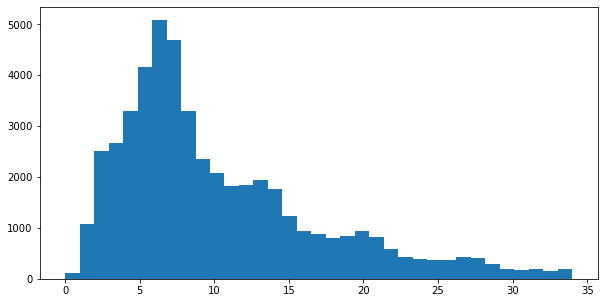

In [124]:
tthDays=[]
for i in tth_ITOG['Time to hire']:
    tthDays.append(i.days)
    
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(tthDays, bins = 35)
ax.plot()

In [ ]:
tth_ITOG['Time to hire']

In [126]:
tth_ITOG.describe()

,Time to hire,Обработка,Интервью с руководителем,СБ,Оформление
count,49312,49264,49283,49244,49312
mean,10 days 12:11:35.247931538,0 days 05:03:42.886164339,0 days 20:32:01.978146622,0 days 18:25:57.438469661,7 days 11:31:00.089592796
std,7 days 00:42:58.572599117,1 days 21:15:32.281243993,3 days 08:35:45.167125419,2 days 05:46:22.973481730,6 days 16:11:32.911433872
min,0 days 08:22:14,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00
25%,5 days 19:29:55.500000,0 days 00:00:17,0 days 00:00:01,0 days 03:20:10.750000,2 days 18:35:02.500000
50%,8 days 02:44:13.500000,0 days 00:00:22,0 days 00:00:01,0 days 04:43:31,5 days 23:10:57.500000
75%,14 days 00:10:58.750000,0 days 00:00:31,0 days 00:00:02,0 days 18:15:29.250000,10 days 06:10:44.750000
max,34 days 23:59:16,34 days 23:07:13,350 days 22:56:44,49 days 19:12:13,71 days 02:49:52


In [120]:
delta_TTH = datetime.timedelta(days=35, 
                           seconds=0, 
                           microseconds=0, 
                           milliseconds=0, 
                           minutes=0, 
                           hours=0, 
                           weeks=0)

In [121]:
tth_ITOG = tth_ITOG2[tth_ITOG2['Time to hire'] < delta_TTH]

In [122]:
tth_ITOG

,Time to hire,Обработка,Интервью с руководителем,СБ,Оформление
3330795,8 days 04:18:12,0 days 00:02:42,5 days 02:35:03,0 days 20:51:54,1 days 01:17:16
3331278,22 days 08:55:39,0 days 00:00:26,0 days 00:00:01,1 days 03:28:30,20 days 03:45:12
3331279,7 days 04:12:22,0 days 00:00:21,0 days 00:00:01,1 days 03:22:20,4 days 17:19:09
3331283,7 days 03:34:11,0 days 00:00:17,0 days 00:00:01,1 days 03:28:25,4 days 23:50:45
3331287,3 days 08:19:41,0 days 00:00:14,0 days 00:00:01,1 days 02:55:29,0 days 21:58:55
...,...,...,...,...,...
3556362,4 days 23:31:19,0 days 00:00:26,0 days 00:00:01,0 days 20:29:16,3 days 02:30:15
3561624,6 days 01:37:48,0 days 00:00:54,1 days 00:46:41,0 days 23:15:23,1 days 22:21:20
3651373,26 days 20:21:11,0 days 00:00:13,0 days 21:32:43,0 days 18:05:43,25 days 04:12:29
3802426,4 days 23:35:03,0 days 00:00:29,0 days 00:00:01,2 days 18:14:40,2 days 03:32:27


In [114]:
df_new[df_new['id_applicant']==4063959]

,id_applicant,id_partner,id_log,department_id,action_date,stage_name,activity_name,result_name,position_name,is_active_action,is_open_action
8117,4063959,3440856,-1,12904,2019-09-11 13:00:06,Создание кандидата,NaN,NaN,Продавец-кассир,True,False
1344068,4063959,3440856,21984958,12904,2019-09-11 13:00:17,Обработка,Провести первичную обработку,Подходит,Продавец-кассир,True,False
1344069,4063959,3440856,21984960,12904,2019-09-11 13:00:18,Обработка,Проверка формы обращения,Не резерв,Продавец-кассир,True,False
1344067,4063959,3440856,21984983,12904,2019-09-11 13:00:27,Интервью с руководителем,Назначить интервью с руководителем,Встреча назначена,Продавец-кассир,True,False
1344066,4063959,3440856,22020081,12904,2019-09-12 15:25:23,Интервью с руководителем,Узнать результаты интервью с руководителем,Нет обратной связи,Продавец-кассир,True,False
1344065,4063959,3440856,22029426,12904,2019-09-12 21:33:03,Интервью с руководителем,Узнать результаты интервью с руководителем,Подходит,Продавец-кассир,True,False
1344064,4063959,3440856,22029427,12904,2019-09-12 21:33:05,СБ,Подготовить анкету кандидата,Подготовлена,Продавец-кассир,True,False
1344062,4063959,3440856,22040316,12904,2019-09-13 12:12:06,СБ,Узнать результаты СБ,Подходит,Продавец-кассир,True,False
1344063,4063959,3440856,22040317,12904,2019-09-13 12:12:07,СБ,Проверка формы обращения,Не резерв,Продавец-кассир,True,False
1344061,4063959,3440856,22044315,12904,2019-09-13 13:27:55,Оформление,Назначить время на оформление/медосмотр,Время назначено,Продавец-кассир,True,False


In [85]:
tth_ITOG.describe()

,Time to hire,Обработка,Интервью с руководителем,СБ,Оформление
count,62462,62316,62378,62390,62462
mean,11 days 01:54:31.528033044,0 days 16:19:23.999069259,1 days 10:33:04.981099105,1 days 01:14:37.831206924,6 days 23:19:44.001360827
std,15 days 19:20:42.697730047,6 days 20:45:17.292959070,8 days 17:25:29.195462484,6 days 02:50:12.692353295,9 days 02:59:19.196133011
min,0 days 00:00:07,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00
25%,3 days 05:46:35,0 days 00:00:17,0 days 00:00:01,0 days 02:04:55.250000,0 days 01:47:20
50%,7 days 03:34:03.500000,0 days 00:00:22,0 days 00:00:01,0 days 04:05:35,4 days 21:40:25.500000
75%,13 days 19:51:20.500000,0 days 00:00:32,0 days 00:00:02,0 days 17:53:42,9 days 03:52:28
max,266 days 18:56:01,241 days 00:02:41,350 days 22:56:44,241 days 02:23:02,156 days 20:59:54


In [88]:
delta_TTH = datetime.timedelta(days=0, 
                           seconds=0, 
                           microseconds=0, 
                           milliseconds=0, 
                           minutes=0, 
                           hours=8, 
                           weeks=0)
tth_ITOG2 = tth_ITOG
tth_ITOG2 = tth_ITOG2.loc[tth_ITOG2['Time to hire'] > delta_TTH]
tth_ITOG2

,Time to hire,Обработка,Интервью с руководителем,СБ,Оформление
3330795,8 days 04:18:12,0 days 00:02:42,5 days 02:35:03,0 days 20:51:54,1 days 01:17:16
3331278,22 days 08:55:39,0 days 00:00:26,0 days 00:00:01,1 days 03:28:30,20 days 03:45:12
3331279,7 days 04:12:22,0 days 00:00:21,0 days 00:00:01,1 days 03:22:20,4 days 17:19:09
3331283,7 days 03:34:11,0 days 00:00:17,0 days 00:00:01,1 days 03:28:25,4 days 23:50:45
3331287,3 days 08:19:41,0 days 00:00:14,0 days 00:00:01,1 days 02:55:29,0 days 21:58:55
...,...,...,...,...,...
3561624,6 days 01:37:48,0 days 00:00:54,1 days 00:46:41,0 days 23:15:23,1 days 22:21:20
3636983,49 days 23:11:04,0 days 00:00:13,4 days 20:49:39,0 days 17:15:19,43 days 06:44:56
3651373,26 days 20:21:11,0 days 00:00:13,0 days 21:32:43,0 days 18:05:43,25 days 04:12:29
3802426,4 days 23:35:03,0 days 00:00:29,0 days 00:00:01,2 days 18:14:40,2 days 03:32:27


In [119]:
tth_ITOG2

,Time to hire,Обработка,Интервью с руководителем,СБ,Оформление
3330795,8 days 04:18:12,0 days 00:02:42,5 days 02:35:03,0 days 20:51:54,1 days 01:17:16
3331278,22 days 08:55:39,0 days 00:00:26,0 days 00:00:01,1 days 03:28:30,20 days 03:45:12
3331279,7 days 04:12:22,0 days 00:00:21,0 days 00:00:01,1 days 03:22:20,4 days 17:19:09
3331283,7 days 03:34:11,0 days 00:00:17,0 days 00:00:01,1 days 03:28:25,4 days 23:50:45
3331287,3 days 08:19:41,0 days 00:00:14,0 days 00:00:01,1 days 02:55:29,0 days 21:58:55
...,...,...,...,...,...
3561624,6 days 01:37:48,0 days 00:00:54,1 days 00:46:41,0 days 23:15:23,1 days 22:21:20
3636983,49 days 23:11:04,0 days 00:00:13,4 days 20:49:39,0 days 17:15:19,43 days 06:44:56
3651373,26 days 20:21:11,0 days 00:00:13,0 days 21:32:43,0 days 18:05:43,25 days 04:12:29
3802426,4 days 23:35:03,0 days 00:00:29,0 days 00:00:01,2 days 18:14:40,2 days 03:32:27


In [89]:
import matplotlib.pyplot as plt

[]

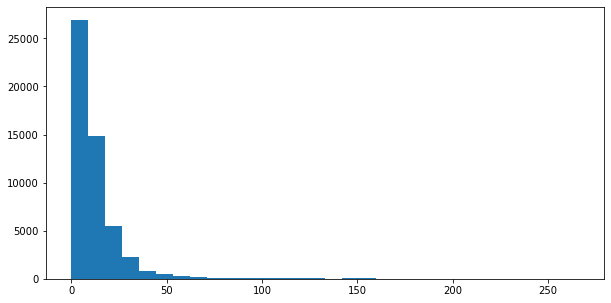

In [90]:
tthDays=[]
for i in tth_ITOG2['Time to hire']:
    tthDays.append(i.days)
    
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(tthDays, bins = 30)
ax.plot()